---

## Data import

The data used in this project can be obtained in [Kaggle (Telecom Churn Dataset)](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets) but it was slightly modified by Alura for learning purposes. The actual dataset used can be found here: [Alura Github](https://github.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/tree/main/Dados)

In [1]:
# Randon seed configuration

import numpy as np

SEED = 123
np.random.seed(SEED)

In [2]:
import pandas as pd

# path to data file
path = './Telecom-Project/dataset/Customer-Churn.csv'

data = pd.read_csv(path)

print(data.shape)
data.head()

(7043, 18)


,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [3]:
# Modifying data manually
translate_dict = {
    'Sim': 1,
    'Nao': 0
}

modified_data = data[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(translate_dict)
modified_data.head()

/tmp/ipykernel_63239/36550278.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  modified_data = data[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(translate_dict)


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [4]:
# Modifying data using get-dummies
# this function will map through the columns and create a new column for each unique value in the original column
dummies_data = pd.get_dummies(
    data.drop(
        ['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], #Removing already modified columns
        axis=1
    )
)

dummies_data.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,False,True,False,True,False,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,34,56.95,True,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,True,False
2,0,2,53.85,True,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,0,45,42.30,False,True,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,True
4,0,2,70.70,True,False,False,False,True,False,True,...,True,False,False,False,True,False,False,True,False,False


In [5]:
# Concatenating the two dataframes (manually modified and get-dummies output)
final_data = pd.concat([modified_data, dummies_data], axis=1)

# Alowing the pd dataframe to show all columns in case the final_data has too many columns
pd.set_option('display.max_columns', final_data.shape[1])

print(final_data.shape) # print the new shape
final_data.head()

(7043, 39)


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


### Checking if our data is balanced

To check if our data is balanced, we plot the distribution of our variable 'y', in our case it will be the Churn column.

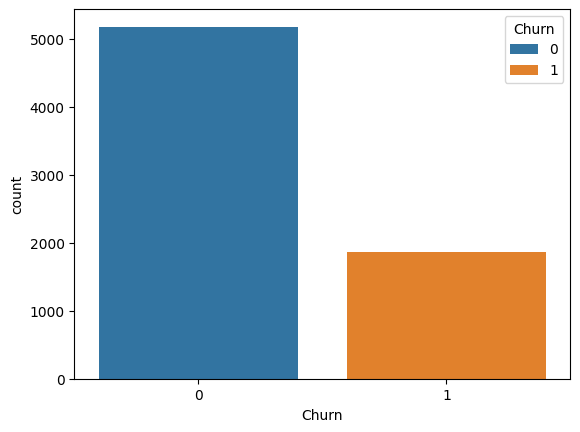

In [6]:
import seaborn as sns

ax = sns.countplot(x='Churn', hue='Churn', data=final_data)

As we can see, our data is unbalanced, as we have around 70% of cases without churn and 30% with churn.

What we expect is a data set with 50% cases withou and 50% with churn. To achieve this, we can use a *Oversampling* technique called **SMOTE** (Synthetic Minority Over-sampling Technique) where we create new synthetic samples until we have a balanced data set.

In [7]:
# Installing te imbalanced learn library
# this code block is not necessary if you already have the library installed in your environment
# !pip install -U imbalanced-learn

In [8]:
# Splitting the data into features and target
x = final_data.drop('Churn', axis=1)
y = final_data['Churn']

In [9]:
# Importing the SMOTE algorithm from the imbalanced-learn library
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=SEED) # Creating the SMOTE object instance using our SEED
x, y = smt.fit_resample(x, y) # Resampling the data

# Concatenating the resampled data
resampled_data = pd.concat([x, y], axis=1)
resampled_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0
2,0,0,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,1
3,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True,0
4,0,0,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,1


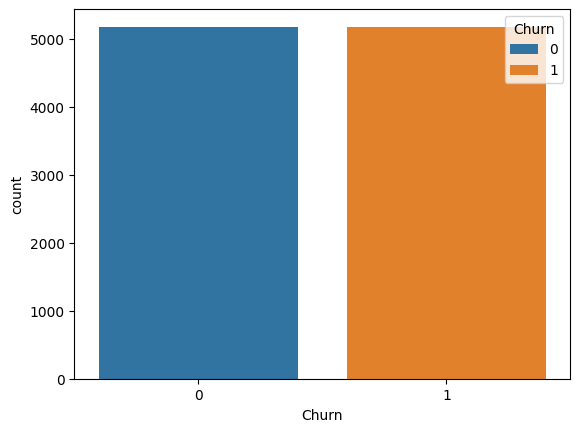

In [10]:
# Checking if the resampled data is balanced
ax = sns.countplot(x='Churn', hue='Churn', data=resampled_data)

Now that our sample is balanced, we can train our models to predict if our customers will leave us or not.

---

## Modeling

### Using KNN algorithm

KNN, or K Nearest Neighbors, is a supervised learning algorithm where the code calculates the distances between the input and data and considers the K nearest neighbors of our input to classify it. This algorithm can be used for either regression or classification problems, but is most commonly used as a classification algorithm. [What is the KNN algorithm? - IBM](https://www.ibm.com/topics/knn)

Since we have a balanced dataset, we need to redefine our features and target:

In [11]:
x = resampled_data.drop('Churn', axis=1)
y = resampled_data['Churn']

Also, because to KNN algorithm we use a distance metrics, we need to adjust our scales:

In [12]:
# Importing the scaler
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

# Scaling
x_scaled = norm.fit_transform(x)

# Transforming x_scaled into a dataframe
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1.265428,-0.52756,-3.060839,0.815149,-0.412542,-1.107687,-1.321770,-0.995949,3.060839,-0.935402,1.483156,-1.058533,-0.448509,0.778354,-0.448509,-0.596251,-1.097291,-0.448509,1.351499,0.919180,-0.448509,-0.739763,0.785736,-0.448509,-0.606679,1.088985,-0.448509,-0.846387,1.106319,-0.448509,-0.857706,-0.460582,0.688073,-0.472712,-0.508201,1.054437,-0.547126,-0.531599
1,-0.790247,-0.52756,0.326708,-1.226769,-0.412542,0.267209,-0.379572,1.004067,-0.326708,-0.935402,1.483156,-1.058533,-0.448509,-1.284763,-0.448509,1.677147,0.911336,-0.448509,-0.739919,-1.087926,-0.448509,1.351785,0.785736,-0.448509,-0.606679,1.088985,-0.448509,-0.846387,1.106319,-0.448509,-0.857706,-0.460582,-1.453334,2.115451,-0.508201,-0.948374,1.827732,-0.531599
2,-0.790247,-0.52756,0.326708,0.815149,-0.412542,-1.066023,-0.487351,1.004067,-0.326708,-0.935402,1.483156,-1.058533,-0.448509,-1.284763,-0.448509,1.677147,-1.097291,-0.448509,1.351499,0.919180,-0.448509,-0.739763,0.785736,-0.448509,-0.606679,1.088985,-0.448509,-0.846387,1.106319,-0.448509,-0.857706,-0.460582,0.688073,-0.472712,-0.508201,-0.948374,1.827732,-0.531599
3,-0.790247,-0.52756,-3.060839,-1.226769,-0.412542,0.725508,-0.888915,-0.995949,3.060839,-0.935402,1.483156,-1.058533,-0.448509,-1.284763,-0.448509,1.677147,0.911336,-0.448509,-0.739919,-1.087926,-0.448509,1.351785,-1.272693,-0.448509,1.648319,1.088985,-0.448509,-0.846387,1.106319,-0.448509,-0.857706,-0.460582,-1.453334,2.115451,-0.508201,-0.948374,-0.547126,1.881116
4,-0.790247,-0.52756,0.326708,0.815149,-0.412542,-1.066023,0.098480,1.004067,-0.326708,-0.935402,-0.674238,0.944704,-0.448509,0.778354,-0.448509,-0.596251,0.911336,-0.448509,-0.739919,0.919180,-0.448509,-0.739763,0.785736,-0.448509,-0.606679,1.088985,-0.448509,-0.846387,1.106319,-0.448509,-0.857706,-0.460582,0.688073,-0.472712,-0.508201,1.054437,-0.547126,-0.531599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1.265428,-0.52756,0.326708,0.815149,-0.412542,-0.941033,0.453841,-0.995949,-0.326708,1.069059,-0.674238,0.944704,-0.448509,0.778354,-0.448509,-0.596251,-1.097291,-0.448509,1.351499,0.919180,-0.448509,-0.739763,0.785736,-0.448509,-0.606679,1.088985,-0.448509,-0.846387,1.106319,-0.448509,-0.857706,-0.460582,0.688073,-0.472712,-0.508201,1.054437,-0.547126,-0.531599
10344,-0.790247,-0.52756,0.326708,0.815149,-0.412542,-1.024360,0.225287,-0.995949,-0.326708,1.069059,-0.674238,0.944704,-0.448509,0.778354,-0.448509,-0.596251,0.911336,-0.448509,-0.739919,0.919180,-0.448509,-0.739763,0.785736,-0.448509,-0.606679,1.088985,-0.448509,-0.846387,1.106319,-0.448509,-0.857706,-0.460582,0.688073,-0.472712,1.967725,-0.948374,-0.547126,-0.531599
10345,-0.790247,-0.52756,0.326708,0.815149,-0.412542,-0.399407,0.079867,1.004067,-0.326708,-0.935402,-0.674238,0.944704,-0.448509,0.778354,-0.448509,-0.596251,0.911336,-0.448509,-0.739919,0.919180,-0.448509,-0.739763,0.785736,-0.448509,-0.606679,1.088985,-0.448509,-0.846387,1.106319,-0.448509,-0.857706,-0.460582,0.688073,-0.472712,-0.508201,1.054437

Now that we have our data prepared, lets implement the model.

First, we need to split our data into train and test data:

In [13]:
# Importing the function to automatically split our data
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    x_scaled,
    y,
    test_size=0.3,
    random_state=SEED
)

Training our model:

In KNN algorithm we can use various functions to calculate the distance, but in our case, we will use thee uclidean distance:

$$
d = \sqrt{\sum_{i = 1}^{k}{(a_i - b_i)^2}}
$$

In [14]:
# Importing the model
from sklearn.neighbors import KNeighborsClassifier

# Creating our model instance
knn = KNeighborsClassifier(
    # n_neighbors=5, # This is the base neighbor value
    metric='euclidean' # Using the euclidean distance
)

# Training
knn.fit(train_x, train_y)

KNeighborsClassifier(metric='euclidean')

Testing the model:

In [15]:
# Making the prediction
predict_knn = knn.predict(test_x)

# Importing accuracy score function
from sklearn.metrics import accuracy_score

# Calculating the accuracy
accuracy_knn = accuracy_score(test_y, predict_knn) * 100
print(f'KNN Accuracy was: {accuracy_knn:.2f}%')

KNN Accuracy was: 81.16%
